In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmasher as cmr
import numpy as np
from decimal import Decimal, ROUND_DOWN

/home/estudiantes/anaconda/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Usar glob para seleccionar todos los archivos CSV en la ruta
archivos_csv = glob.glob("/home/andreagvc/data/ERA/ERA/aux_csv/*.csv")

# Leer y concatenar todos los archivos CSV
df_concatenado = pd.concat([pd.read_csv(f) for f in archivos_csv], ignore_index=True)

# Ver el DataFrame concatenado
print(df_concatenado)

               ERA5      HadSID                           time    var     SID
0         11.540000  288.730000  1990-01-01T21:00:00.000000000  TWB_d  761600
1          6.580000  281.280000  1990-01-02T12:00:00.000000000  TWB_d  761600
2          6.500000  281.030000  1990-01-02T15:00:00.000000000  TWB_d  761600
3         11.180000  284.120000  1990-01-02T18:00:00.000000000  TWB_d  761600
4         11.800000  287.010000  1990-01-02T21:00:00.000000000  TWB_d  761600
...             ...         ...                            ...    ...     ...
17382076   0.014425    0.015457  2008-12-31T12:00:00.000000000    q_d  769043
17382077   0.014879    0.016414  2008-12-31T15:00:00.000000000    q_d  769043
17382078   0.015098    0.015411  2008-12-31T18:00:00.000000000    q_d  769043
17382079   0.014240    0.015411  2008-12-31T19:00:00.000000000    q_d  769043
17382080   0.014716    0.017486  2008-12-31T21:00:00.000000000    q_d  769043

[17382081 rows x 5 columns]


In [3]:
df_concatenado["time"]=pd.to_datetime(df_concatenado['time'])

In [4]:
df_concatenado = df_concatenado.set_index('time')

In [6]:
Ts=df_concatenado.loc[df_concatenado["var"]=="T_d"]
Tws=df_concatenado.loc[df_concatenado["var"]=="TWB_d"]
qs=df_concatenado.loc[df_concatenado["var"]=="q_d"]

In [7]:
grouped_Ts=Ts.groupby([Ts.index.year,"SID"]).max(["HadSID","ERA5"]).reset_index()
grouped_Tws=Tws.groupby([Tws.index.year,"SID"]).max(["HadSID","ERA5"]).reset_index()
grouped_qs=qs.groupby([qs.index.year,"SID"]).max(["HadSID","ERA5"]).reset_index()

In [8]:
grouped_yearly_Ts=grouped_Ts.groupby(["SID"]).max(["HadSID","ERA5"])
grouped_yearly_Tws=grouped_Tws.groupby(["SID"]).max(["HadSID","ERA5"])
grouped_yearly_qs=grouped_qs.groupby(["SID"]).max(["HadSID","ERA5"])

In [9]:
#Coordenadas de estaciones 
cor=pd.read_csv("/home/andreagvc/data/ERA/ERA/clusterinf_Had.csv")


#Seleciconando las latitudes y las longitudes
lat=cor.lat
lon=cor.Lon

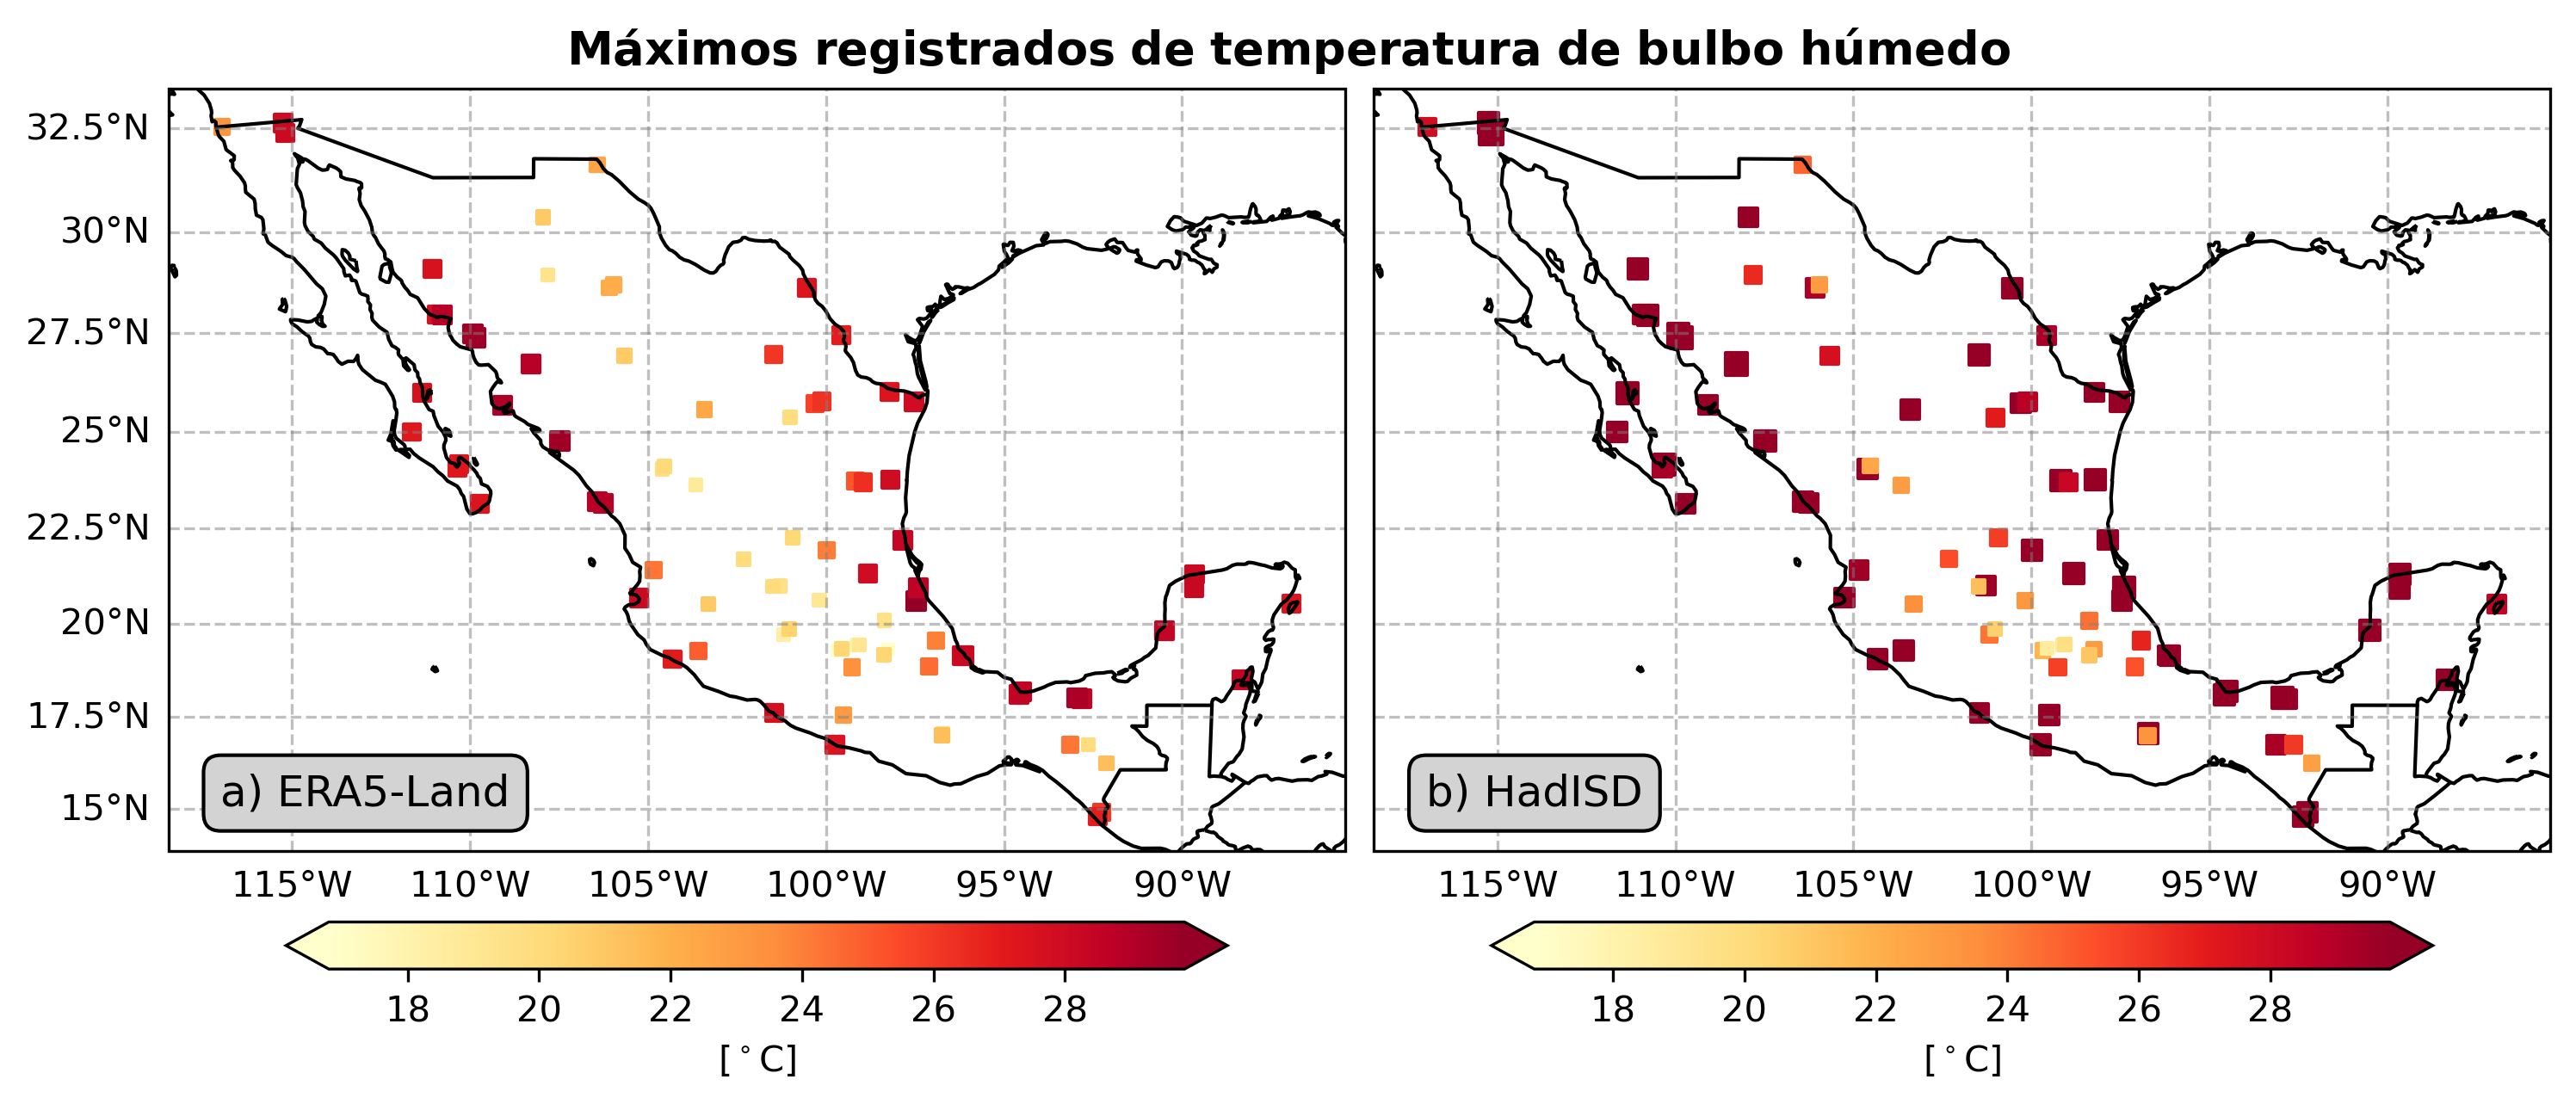

In [10]:
lista=[grouped_yearly_Tws.ERA5,grouped_yearly_Tws.HadSID-273.15]
p=["a) ERA5-Land","b) HadISD"]
x=lon.astype(float)
y=lat.astype(float)
color=["YlOrRd"]
fig = plt.figure(figsize=(10, 6),dpi=300)
n=0
for i,ii in enumerate(lista):
    ax = fig.add_subplot(1, 2, n+1, projection=ccrs.Mercator())
    ax.set_global
 
    if n<3:
        ccmap=cmr.get_sub_cmap(color[0], 0, 0.95)
        
        c=np.array(ii)
        cs=ax.scatter(x=x,y=y,c=np.array(c),cmap=ccmap,marker='s', s=(c/6)**2,transform=ccrs.PlateCarree(),vmin=np.min(np.array(grouped_yearly_Tws.ERA5)), vmax=np.max(np.array(grouped_yearly_Tws.ERA5)))
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,extend="both",shrink=0.8,pad=0.05)
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        # It should turn off the upper x ticks
        if n==1:
            gl=ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
            gl.left_labels=False
            gl.top_labels = gl.right_labels = False
           
        else:
            gl=ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
            gl.top_labels = gl.right_labels = False
            ax.xlabels_top = False
        ax.text(-117, 16, p[n], fontsize=12, color="black",
            ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                           boxstyle="round", pad=0.4),
            transform=ccrs.PlateCarree())
    
        
        if n==0:
        
      
            cbar.ax.set_xlabel("[$^\circ$C]")
        if n==1:
      
            cbar.ax.set_xlabel("[$^\circ$C]")
          
   
        
    n=n+1
        
    
plt.suptitle(r"$\mathbf{Máximos}$ $\mathbf{registrados}$ $\mathbf{de}$ $\mathbf{temperatura}$ $\mathbf{de}$ $\mathbf{bulbo}$ $\mathbf{húmedo}$", fontsize=13, y=0.78)    
plt.tight_layout(pad=0.8,h_pad=0) 

plt.savefig("MaximosERAVSHAD.svg",bbox_inches="tight",dpi=300)
plt.savefig("MaximosERAVSHAD.png",bbox_inches="tight",dpi=300)        
    